In [1]:
#iris dataset
import pandas as pd

url="http://training.xcelvations.com/data/iris.csv"
df=pd.read_csv(url)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 5)

In [3]:
#taking 2 variables x and y later which can be used for traing and splitting the data
X = df.iloc[:,0:3].values
y = df.iloc[:,4].values

print(X[0:5])
print(y[0:5])

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.1 1.5]
 [5.  3.6 1.4]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [4]:
print(X.shape,y.shape)
y[0:10]

(150, 3) (150,)


array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
#target y is in string format, hence "one hot encoding"
label_encoder = LabelEncoder()
y_final = label_encoder.fit_transform(y)
print(X.shape,y.shape)

(150, 3) (150,)


In [6]:
#split the dataset into train and test to feed the neural network
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(X, y_final, test_size=0.2, random_state=10)

In [7]:
#build model
y_out=3
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')            
])

In [8]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(X_train_all,Y_train_all,epochs=100,validation_data=(X_test_all,Y_test_all))

Epoch 1/100
4/4 [==============================] - 0s 43ms/step - loss: 1.0198 - accuracy: 0.7333 - val_loss: 1.0145 - val_accuracy: 0.7667
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9941 - accuracy: 0.8000 - val_loss: 1.0169 - val_accuracy: 0.5333
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9864 - accuracy: 0.6917 - val_loss: 1.0178 - val_accuracy: 0.5333
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9750 - accuracy: 0.6917 - val_loss: 0.9972 - val_accuracy: 0.5333
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9620 - accuracy: 0.7000 - val_loss: 0.9852 - val_accuracy: 0.5333
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9542 - accuracy: 0.7167 - val_loss: 0.9771 - val_accuracy: 0.5333
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9436 - accuracy: 0.7083 - val_loss: 0.9719 - val_accuracy: 0.5333
Epoch 8/100
4/4 [=========

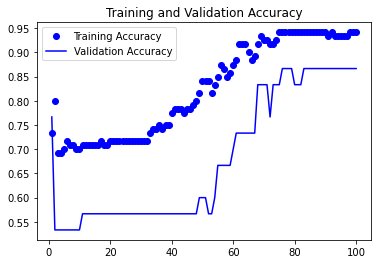

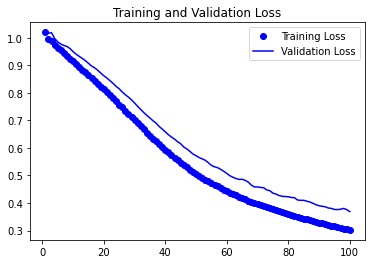

In [9]:
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(1,len(acc)+1)

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'b' ,label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss,'bo', label='Training Loss')
plt.plot(epochs_range, val_loss,'b', label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()